# Import Neccessary Librabies

In [ ]:
import pandas as pd
import numpy as np
import datetime as dt
import random

import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('ggplot')
import matplotlib.style as style
style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15, 8)


from sklearn import preprocessing
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv("logs_dataset.csv")

In [ ]:
df

,@timestamp,_id,ip_address
0,"July 8th 2019, 14:43:03.000",XswJ0msBoTGddM7vxMDB,10.1.1.285
1,"July 8th 2019, 14:43:01.000",dKQJ0msB7mP0GwVzvJjz,10.1.2.389
2,"July 8th 2019, 14:42:59.000",CcwJ0msBoTGddM7vtb8y,10.1.1.415
3,"July 8th 2019, 14:42:57.000",bKQJ0msB7mP0GwVzrZdT,10.1.1.79
4,"July 8th 2019, 14:42:55.000",L6QJ0msB7mP0GwVzpZeI,10.1.1.60
...,...,...,...
721542,"June 9th 2019, 00:00:25.000",dkWJOWsBoTGddM7vRUOR,10.1.2.66
721543,"June 9th 2019, 00:00:19.000",TBuJOWsB7mP0GwVzLmol,10.1.1.249
721544,"June 9th 2019, 00:00:15.000",vUWJOWsBoTGddM7vHkGD,10.1.1.200
721545,"June 9th 2019, 00:00:09.000",aUWJOWsBoTGddM7vB0AR,10.1.2.432


# Feature Extraction

In [ ]:
df['@timestamp'] = pd.to_datetime(df['@timestamp'])

This changes the timestamp from original to modified form

In [ ]:
df.sort_values(['ip_address', '@timestamp'], inplace=True)

This sorts the dataset wrt to ip address and timestamp

In [ ]:
df['shift_time'] = df.groupby(['ip_address'])['@timestamp'].shift(1)

It creates shift_time column one shiftdown for timestamp coumn

In [ ]:
df['time_diff'] = (df['@timestamp'] -df['shift_time']).dt.seconds//60

Finding the time differnce between timestamp and shift time

In [ ]:
df['date'] = df['@timestamp'].dt.date

Extracting the date from timestamp and creating seperate column

In [ ]:
df['weekday'] = df['@timestamp'].dt.weekday

Extracting the no of weekdays present in timestamp

In [ ]:
df['hour'] = df['@timestamp'].dt.hour

Finding the no.of hours present in timestamp column

In [ ]:
df['is_weekend'] = ((df['weekday']==5 |(df['weekday']==6)).astype(int))

Finding how many weekend are present in timestamp

In [ ]:
df['hour_bucket'] = df['hour']//4

In [ ]:
df

,@timestamp,_id,ip_address,shift_time,time_diff,date,weekday,hour,is_weekend,hour_bucket
721473,2019-06-09 00:06:09,DBuOOWsB7mP0GwVzhZ9U,10.1.1.1,NaT,NaN,2019-06-09,6,0,0,0
720483,2019-06-09 01:28:39,bB7aOWsB7mP0GwVzDY5G,10.1.1.1,2019-06-09 00:06:09,82.0,2019-06-09,6,1,0,0
719233,2019-06-09 03:12:49,R0w5OmsBoTGddM7vayZT,10.1.1.1,2019-06-09 01:28:39,104.0,2019-06-09,6,3,0,0
719222,2019-06-09 03:13:45,U0w6OmsBoTGddM7vRi8R,10.1.1.1,2019-06-09 03:12:49,0.0,2019-06-09,6,3,0,0
718875,2019-06-09 03:42:39,z01UOmsBoTGddM7vuzyC,10.1.1.1,2019-06-09 03:13:45,28.0,2019-06-09,6,3,0,0
...,...,...,...,...,...,...,...,...,...,...
3225,2019-07-08 11:49:00,3cBq0WsBoTGddM7va5TJ,10.1.2.99,2019-07-08 11:47:15,1.0,2019-07-08,0,11,0,2
2422,2019-07-08 12:22:29,QMKJ0WsBoTGddM7vE9N1,10.1.2.99,2019-07-08 11:49:00,33.0,2019-07-08,0,12,0,3
1704,2019-07-08 12:52:25,9pyk0WsB7mP0GwVze7sV,10.1.2.99,2019-07-08 12:22:29,29.0,2019-07-08,0,12,0,3
1138,2019-07-08 13:15:59,B8a60WsBoTGddM7vDnqQ,10.1.2.99,2019-07-08 12:52:25,23.0,2019-07-08,0,13,0,3


In [ ]:
ip_addr ='ip_address'

In [ ]:
ip_counts = df.groupby(ip_addr)['@timestamp'].count().reset_index()

Counting how many times the user in logging into the computer wrt to ip address

In [ ]:
ip_counts

,ip_address,@timestamp
0,10.1.1.1,1446
1,10.1.1.100,2860
2,10.1.1.101,1465
3,10.1.1.106,1408
4,10.1.1.109,1459
...,...,...
381,10.1.2.86,4307
382,10.1.2.89,2826
383,10.1.2.90,2904
384,10.1.2.95,2868


In [ ]:
ip_counts = ip_counts.rename(columns={'@timestamp':'total_count'})

In [ ]:
daily_counts = df.groupby([ip_addr,'date'])['@timestamp'].count().reset_index()

In [ ]:
daily_counts

,ip_address,date,@timestamp
0,10.1.1.1,2019-06-09,36
1,10.1.1.1,2019-06-10,37
2,10.1.1.1,2019-06-11,70
3,10.1.1.1,2019-06-12,38
4,10.1.1.1,2019-06-13,32
...,...,...,...
11575,10.1.2.99,2019-07-04,79
11576,10.1.2.99,2019-07-05,61
11577,10.1.2.99,2019-07-06,89
11578,10.1.2.99,2019-07-07,47


In [ ]:
daily_counts = daily_counts.rename(columns={'@timestamp':'daily_counts'})

In [ ]:
daily_counts_avg = daily_counts.groupby(ip_addr).daily_counts.median().reset_index()

Calculating the median of the counts for all the date having the same ip address

In [ ]:
daily_counts_avg.head(5)

,ip_address,daily_counts
0,10.1.1.1,40.0
1,10.1.1.100,78.0
2,10.1.1.101,40.0
3,10.1.1.106,35.5
4,10.1.1.109,42.5


In [ ]:
weekend_counts = df.groupby([ip_addr, 'is_weekend'])['@timestamp'].count().reset_index()

In [ ]:
weekend_counts

,ip_address,is_weekend,@timestamp
0,10.1.1.1,0,1245
1,10.1.1.1,1,201
2,10.1.1.100,0,2463
3,10.1.1.100,1,397
4,10.1.1.101,0,1260
...,...,...,...
767,10.1.2.90,1,395
768,10.1.2.95,0,2478
769,10.1.2.95,1,390
770,10.1.2.99,0,1198


In [ ]:
weekend_counts = weekend_counts.rename(columns={'@timestamp':'weekend_counts'})

In [ ]:
weekend_counts.head()

,ip_address,is_weekend,weekend_counts
0,10.1.1.1,0,1245
1,10.1.1.1,1,201
2,10.1.1.100,0,2463
3,10.1.1.100,1,397
4,10.1.1.101,0,1260


calucating no.of logins occured in the weekends and weekdays

In [ ]:
weekend_counts_avg = weekend_counts.pivot_table(index=ip_addr, columns='is_weekend').reset_index([0])

In [ ]:
weekend_counts_avg.head()

ip_address weekend_counts     
is_weekend                          0    1
0             10.1.1.1           1245  201
1           10.1.1.100           2463  397
2           10.1.1.101           1260  205
3           10.1.1.106           1190  218
4           10.1.1.109           1244  215

In [ ]:
weekend_counts_avg.columns = weekend_counts_avg.columns.droplevel()

In [ ]:
weekend_counts_avg

is_weekend,,0,1
0,10.1.1.1,1245,201
1,10.1.1.100,2463,397
2,10.1.1.101,1260,205
3,10.1.1.106,1190,218
4,10.1.1.109,1244,215
...,...,...,...
381,10.1.2.86,3699,608
382,10.1.2.89,2435,391
383,10.1.2.90,2509,395
384,10.1.2.95,2478,390


In [ ]:
weekend_counts_avg.columns = [ip_addr, 'week_day', 'weekend']

In [ ]:
weekend_counts_avg['is_weekend_ratio'] = weekend_counts_avg['week_day']/ weekend_counts_avg['weekend']

finding the ratio between weekday and weekend

In [ ]:
weekend_counts_avg.head()

,ip_address,week_day,weekend,is_weekend_ratio
0,10.1.1.1,1245,201,6.194030
1,10.1.1.100,2463,397,6.204030
2,10.1.1.101,1260,205,6.146341
3,10.1.1.106,1190,218,5.458716
4,10.1.1.109,1244,215,5.786047


In [ ]:
lean_weekend_counts_avg = weekend_counts_avg[[ip_addr, 'is_weekend_ratio']]

In [ ]:
lean_weekend_counts_avg.head()

,ip_address,is_weekend_ratio
0,10.1.1.1,6.194030
1,10.1.1.100,6.204030
2,10.1.1.101,6.146341
3,10.1.1.106,5.458716
4,10.1.1.109,5.786047


In [ ]:
avg_time_data = df.groupby(ip_addr).agg({'time_diff':['mean','max']}).reset_index()

In [ ]:
avg_time_data.head()

ip_address  time_diff       
                    mean    max
0    10.1.1.1  28.999308  362.0
1  10.1.1.100  14.427072  185.0
2  10.1.1.101  28.520492  211.0
3  10.1.1.106  29.771144  319.0
4  10.1.1.109  28.711934  278.0

In [ ]:
avg_time_data.columns = avg_time_data.columns.droplevel()

In [ ]:
avg_time_data.columns = [ip_addr, 'td_mean', 'td_max']

calulating the mean and max for time_diff column and labelling as td_mean and td_max

In [ ]:
avg_time_data.head()

,ip_address,td_mean,td_max
0,10.1.1.1,28.999308,362.0
1,10.1.1.100,14.427072,185.0
2,10.1.1.101,28.520492,211.0
3,10.1.1.106,29.771144,319.0
4,10.1.1.109,28.711934,278.0


## Total Features Set 

In [ ]:
mer_1 = ip_counts.merge(daily_counts_avg, on=ip_addr, how='left')

In [ ]:
mer_2 = mer_1.merge(lean_weekend_counts_avg, on=ip_addr, how='left')

In [ ]:
final_dataset = mer_2.merge(avg_time_data, on=ip_addr, how='left')

In [ ]:
final_dataset.head()

,ip_address,total_count,daily_counts,is_weekend_ratio,td_mean,td_max
0,10.1.1.1,1446,40.0,6.194030,28.999308,362.0
1,10.1.1.100,2860,78.0,6.204030,14.427072,185.0
2,10.1.1.101,1465,40.0,6.146341,28.520492,211.0
3,10.1.1.106,1408,35.5,5.458716,29.771144,319.0
4,10.1.1.109,1459,42.5,5.786047,28.711934,278.0


In [ ]:
ip_map = final_dataset[ip_addr].to_dict()

In [ ]:
RANDOM_STATE = 30

# KMeans

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
final_dataset.columns

Index(['ip_address', 'total_count', 'daily_counts', 'is_weekend_ratio',
       'td_mean', 'td_max'],
      dtype='object')

Displaying the columns present in the final_dataset

In [ ]:
requi_feature_cols = ['total_count', 'daily_counts', 'is_weekend_ratio', 'td_mean', 'td_max']

In [ ]:
new_data = final_dataset[requi_feature_cols]

In [ ]:
min_max_scaler = preprocessing.MinMaxScaler()

In [ ]:
data_scaled = min_max_scaler.fit_transform(new_data)
new_data = pd.DataFrame(data_scaled,columns=requi_feature_cols)

In [ ]:
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

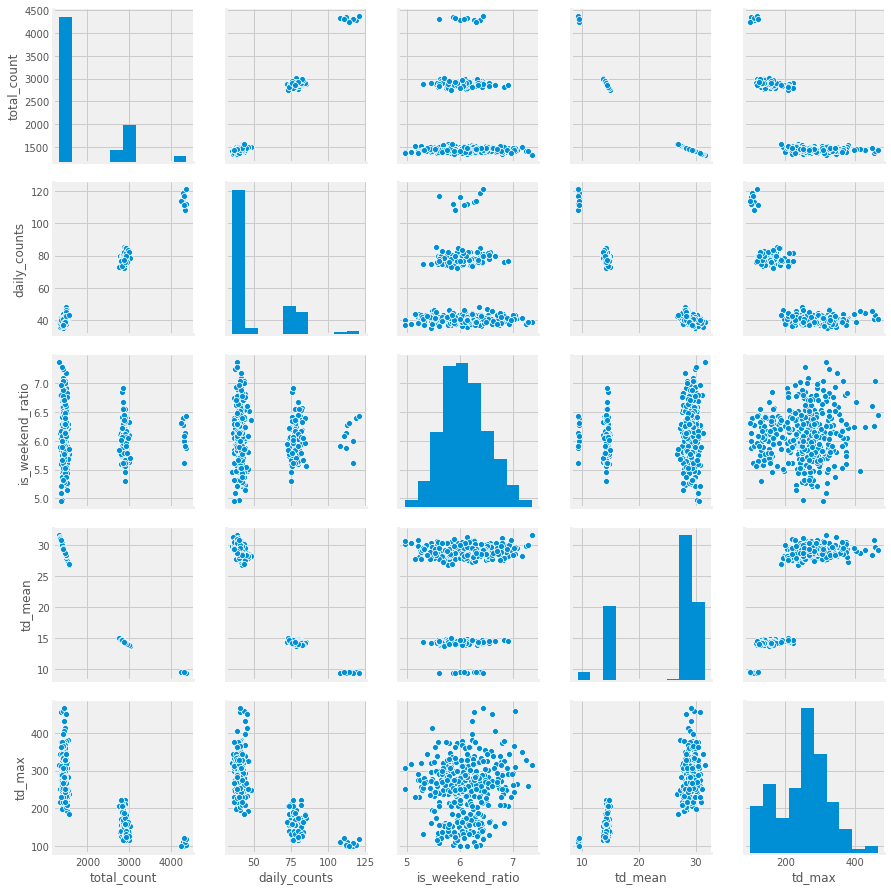

In [ ]:
sns.pairplot(final_dataset[requi_feature_cols])

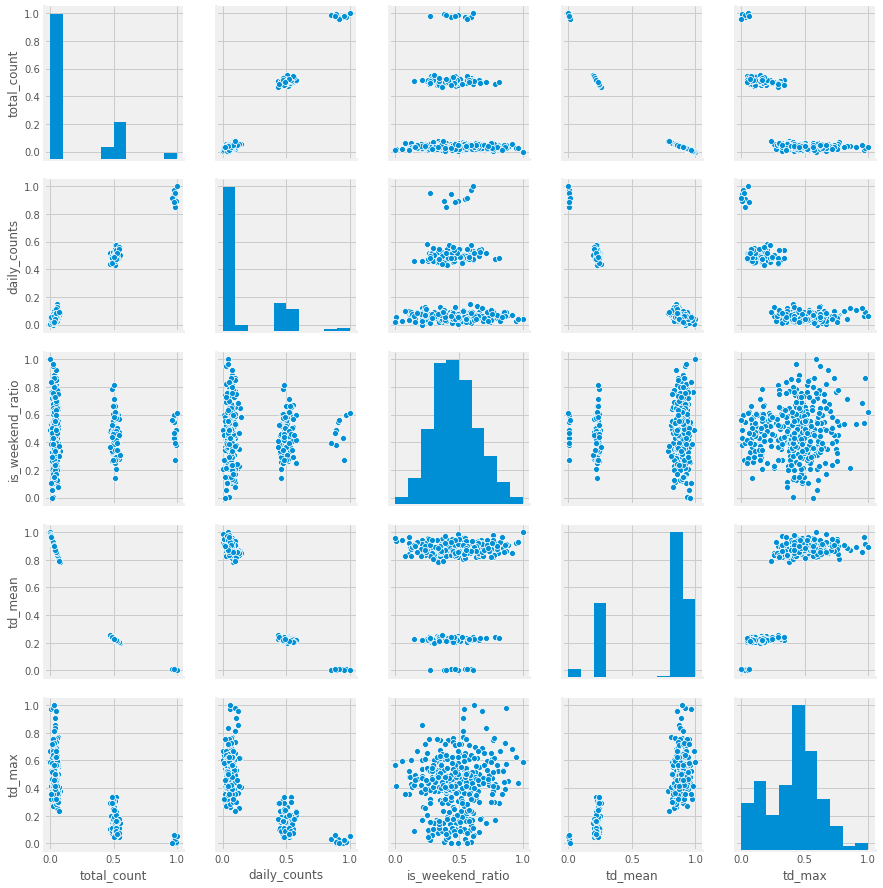

In [ ]:
sns.pairplot(new_data)

In [ ]:
cluster_num = range(1,15)

In [ ]:
kmeans = [KMeans(n_clusters=i, random_state=RANDOM_STATE).fit(new_data) for i in cluster_num]

In [ ]:
kmeans

[KMeans(n_clusters=1, random_state=30),
 KMeans(n_clusters=2, random_state=30),
 KMeans(n_clusters=3, random_state=30),
 KMeans(n_clusters=4, random_state=30),
 KMeans(n_clusters=5, random_state=30),
 KMeans(n_clusters=6, random_state=30),
 KMeans(n_clusters=7, random_state=30),
 KMeans(random_state=30),
 KMeans(n_clusters=9, random_state=30),
 KMeans(n_clusters=10, random_state=30),
 KMeans(n_clusters=11, random_state=30),
 KMeans(n_clusters=12, random_state=30),
 KMeans(n_clusters=13, random_state=30),
 KMeans(n_clusters=14, random_state=30)]

In [ ]:
scores = [kmeans[i].score(new_data) for i in range(len(kmeans))]

In [ ]:
scores

[-105.61717382018342,
 -22.66249794058993,
 -15.57840280659395,
 -11.341164011177808,
 -9.259299744695017,
 -7.683728512855124,
 -6.606023685500107,
 -5.794806058723629,
 -5.122812630205779,
 -4.660301215865439,
 -4.318797070990928,
 -4.008893873576492,
 -3.7715924690517157,
 -3.5178420841110003]

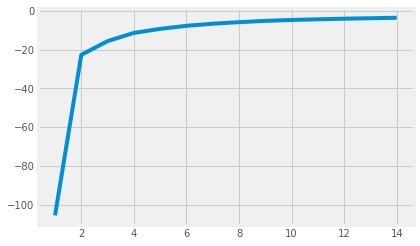

In [ ]:
fig, sd = plt.subplots()
sd.plot(cluster_num,scores)
plt.show()

Displays the graph between no of clusters taken (i.e., 15) and scores calculate using kmeans

In [ ]:
kmeans_cluster_model=kmeans[5]

In [ ]:
kmeans_cluster_model

KMeans(n_clusters=6, random_state=30)

In [ ]:
final_dataset['cluster'] = kmeans_cluster_model.predict(new_data)
final_dataset['cluster'].value_counts()

1    98
2    94
0    71
3    64
5    49
4    10
Name: cluster, dtype: int64

# Clustering model with TSNE

t-Distributed Stochastic Neighbor Embedding (t-SNE)

In [ ]:
from sklearn.manifold import TSNE

In [ ]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300, random_state=RANDOM_STATE)

In [ ]:
tsne_result = tsne.fit_transform(new_data)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 386 samples in 0.000s...
[t-SNE] Computed neighbors for 386 samples in 0.021s...
[t-SNE] Computed conditional probabilities for sample 386 / 386
[t-SNE] Mean sigma: 0.081652
[t-SNE] KL divergence after 250 iterations with early exaggeration: 56.094070
[t-SNE] KL divergence after 300 iterations: 0.289911


In [ ]:
tsne_result

array([[ 1.19360590e+00,  3.76524663e+00],
       [ 1.48508215e+01, -6.47645664e+00],
       [-8.91181183e+00, -1.13720238e+00],
       [-5.81109619e+00,  1.17533770e+01],
       [-6.78442812e+00,  7.71934319e+00],
       [-1.04951887e+01,  5.59534550e+00],
       [-6.07558966e+00,  1.09000711e+01],
       [-1.86453152e+00, -5.29438925e+00],
       [-1.03995714e+01,  3.90814328e+00],
       [-9.10949898e+00,  1.33799257e+01],
       [-2.31459594e+00,  7.09469509e+00],
       [-7.09908152e+00,  9.33714199e+00],
       [-7.26400375e+00,  1.30282164e+00],
       [-1.21029353e+00, -5.82739639e+00],
       [-6.89670134e+00,  1.17153969e+01],
       [ 1.02316380e+01, -1.16813822e+01],
       [-9.62858868e+00,  4.44980812e+00],
       [-1.87756348e+00, -3.96047354e+00],
       [ 1.27354965e+01, -4.41058111e+00],
       [-1.15563278e+01,  3.50963902e+00],
       [ 1.20892372e+01, -6.12156057e+00],
       [-6.57936811e+00, -4.13710165e+00],
       [ 1.41045132e+01, -6.76979876e+00],
       [ 1.

In [ ]:
final_dataset['tsne-2d-one'] = tsne_result[:,0]
final_dataset['tsne-2d-two'] = tsne_result[:,1]

In [ ]:
tsne_cluster = final_dataset.groupby('cluster').agg({'tsne-2d-one':'mean','tsne-2d-two':'mean'}).reset_index()

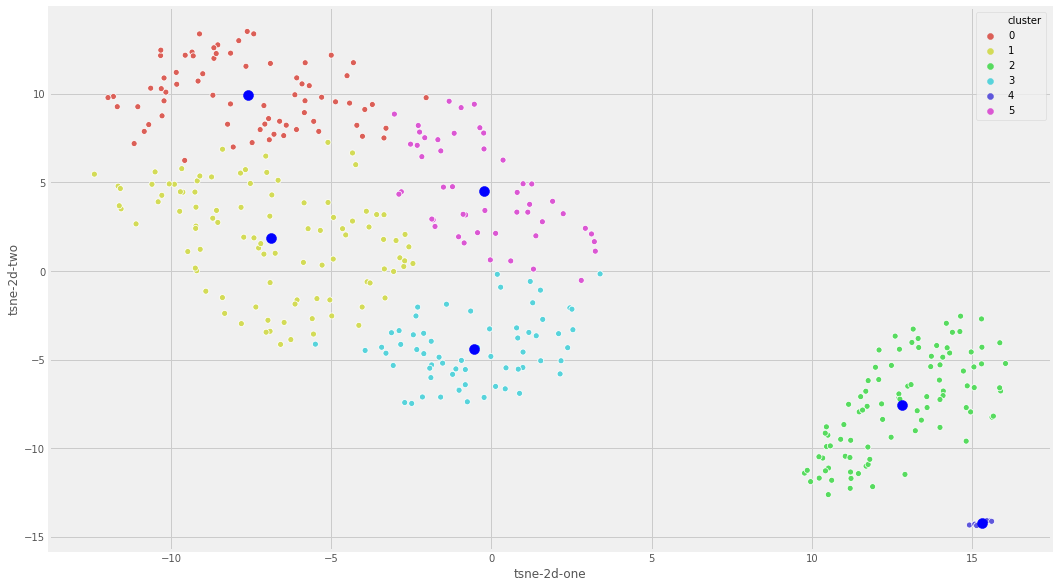

In [ ]:
plt.figure(figsize=(16,10))

sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="cluster",
    palette=sns.color_palette("hls", 6),
    data=final_dataset,
    legend="full",
    alpha=1
)

plt.scatter(x="tsne-2d-one", y="tsne-2d-two", data=tsne_cluster, s=100, c='b')

plt.show()

In [ ]:
centers = kmeans_cluster_model.cluster_centers_

In [ ]:
pts = np.asarray(new_data)

In [ ]:
pts

array([[0.03813281, 0.05263158, 0.51209855, 0.88495446, 0.71662125],
       [0.50295858, 0.49707602, 0.51626613, 0.23136629, 0.23433243],
       [0.0443787 , 0.05263158, 0.49222476, 0.86347879, 0.30517711],
       ...,
       [0.51742275, 0.47368421, 0.57788924, 0.22188316, 0.16348774],
       [0.50558843, 0.49122807, 0.57870081, 0.2304837 , 0.24250681],
       [0.03057199, 0.01754386, 0.14970523, 0.90324786, 0.45776567]])

In [ ]:
total_dist = pd.Series()

In [ ]:
def get_sum_square_distance(data, kmeans_cluster_model):
    centers = kmeans_cluster_model.cluster_centers_
    pts = np.asarray(data[requi_feature_cols])
    total_dist = pd.Series()
    for i in range(len(pts)):
        dist = 0
        for j in range(len(centers)):
            a = np.linalg.norm(pts[i] - centers[j])
            dist += a**2
        total_dist.set_value(i, dist)
    
    return total_dist 

In [ ]:
final_dataset['sum_squa_dist'] = get_sum_square_distance(new_data, kmeans_cluster_model)

In [ ]:
plt.hist(final_dataset['sum_squa_dist'], bins=100)

In [ ]:
cutoff = 6

In [ ]:
final_dataset['anomaly_kmeans'] = (final_dataset['sum_squa_dist'] >= cutoff).astype(int)

In [ ]:
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="anomaly_kmeans",
    data=final_dataset,
    legend="full",
    alpha=1
)

In [ ]:
final_dataset.loc[final_dataset['anomaly_kmeans']==1]

# Isolated Forest

In [ ]:
from sklearn.ensemble import IsolationForest

In [ ]:
outlier_frac = 0.028

In [ ]:
final_dataset.columns

Index(['ip_address', 'total_count', 'daily_counts', 'is_weekend_ratio',
       'td_mean', 'td_max', 'cluster', 'tsne-2d-one', 'tsne-2d-two'],
      dtype='object')

In [ ]:
new_data.head()

,total_count,daily_counts,is_weekend_ratio,td_mean,td_max
0,0.038133,0.052632,0.512099,0.884954,0.716621
1,0.502959,0.497076,0.516266,0.231366,0.234332
2,0.044379,0.052632,0.492225,0.863479,0.305177
3,0.025641,0.000000,0.205662,0.919573,0.599455
4,0.042406,0.081871,0.342074,0.872065,0.487738


In [ ]:
iso_model =  IsolationForest(n_jobs=-1, n_estimators=200, max_features=3, random_state=RANDOM_STATE, contamination=outlier_frac)

In [ ]:
iso_model.fit(new_data)

IsolationForest(contamination=0.028, max_features=3, n_estimators=200,
                n_jobs=-1, random_state=30)

In [ ]:
final_dataset['anomaly_isolated'] = pd.Series(iso_model.predict(new_data))

In [ ]:
final_dataset['anomaly_isolated'] = final_dataset['anomaly_isolated'].map( {1: 0, -1: 1} )

In [ ]:
final_dataset['anomaly_isolated'].value_counts()

0    375
1     11
Name: anomaly_isolated, dtype: int64

<AxesSubplot:xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

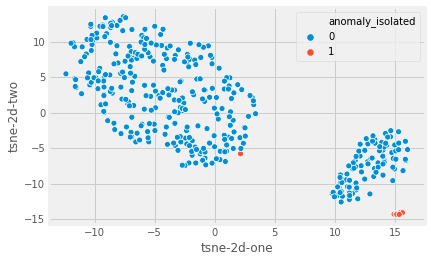

In [ ]:
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="anomaly_isolated",
    data=final_dataset,
    legend="full",
    alpha=1
)

In [ ]:
final_dataset.loc[final_dataset['anomaly_isolated']==1]

,ip_address,total_count,daily_counts,is_weekend_ratio,td_mean,td_max,cluster,tsne-2d-one,tsne-2d-two,anomaly_isolated
62,10.1.1.249,4301,116.5,6.004886,9.459535,101.0,4,15.251837,-14.266325,1
118,10.1.1.386,4300,118.5,6.388316,9.453361,104.0,4,15.563724,-14.071769,1
163,10.1.1.483,1330,39.0,7.364780,31.564334,316.0,3,2.144543,-5.802428,1
164,10.1.1.486,4317,117.0,5.611026,9.417285,108.0,4,14.919126,-14.328329,1
177,10.1.1.63,4339,112.0,6.136513,9.368142,101.0,4,15.361731,-14.173064,1
188,10.1.1.86,4293,113.0,6.276271,9.456897,110.0,4,15.410590,-14.102712,1
255,10.1.2.249,4353,112.0,5.876777,9.332721,102.0,4,15.083615,-14.277177,1
311,10.1.2.386,4326,108.0,5.910543,9.392370,110.0,4,15.143045,-14.360385,1
357,10.1.2.486,4251,114.0,6.316695,9.571059,99.0,4,15.463327,-14.083534,1
370,10.1.2.63,4372,121.0,6.435374,9.268588,118.0,4,15.612681,-14.118538,1


# One Class SVM

In [ ]:
from sklearn.svm import OneClassSVM

In [ ]:
svm_model =  OneClassSVM(nu=outlier_frac, degree=2, kernel='rbf')

In [ ]:
new_data_clean = new_data.loc[new_data.total_count <=new_data.total_count.quantile(1-outlier_frac)]

In [ ]:
svm_model.fit(new_data_clean)

OneClassSVM(degree=2, nu=0.028)

In [ ]:
final_dataset['anomaly_svm'] = pd.Series(svm_model.predict(new_data))

In [ ]:
final_dataset['anomaly_svm'] = final_dataset['anomaly_svm'].map( {1: 0, -1: 1} )

In [ ]:
final_dataset['anomaly_svm'].value_counts()

0    367
1     19
Name: anomaly_svm, dtype: int64

<AxesSubplot:xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

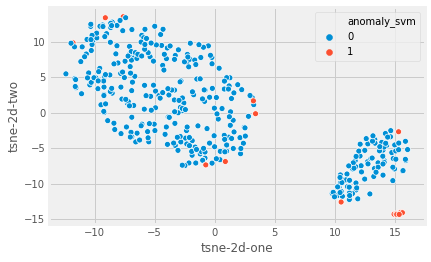

In [ ]:
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="anomaly_svm",
    data=final_dataset,
    legend="full",
    alpha=1
)

In [ ]:
final_dataset.loc[final_dataset['anomaly_svm']==1]

,ip_address,total_count,daily_counts,is_weekend_ratio,td_mean,td_max,cluster,tsne-2d-one,tsne-2d-two,anomaly_isolated,anomaly_svm
9,10.1.1.12,1392,40.0,4.974249,30.152408,250.0,0,-9.109499,13.379926,0,1
37,10.1.1.186,1372,37.0,4.965217,30.557987,308.0,0,-7.619674,13.520933,0,1
62,10.1.1.249,4301,116.5,6.004886,9.459535,101.0,4,15.251837,-14.266325,1,1
118,10.1.1.386,4300,118.5,6.388316,9.453361,104.0,4,15.563724,-14.071769,1,1
164,10.1.1.486,4317,117.0,5.611026,9.417285,108.0,4,14.919126,-14.328329,1,1
177,10.1.1.63,4339,112.0,6.136513,9.368142,101.0,4,15.361731,-14.173064,1,1
183,10.1.1.73,1484,40.5,5.480349,28.191504,195.0,0,-11.796299,9.849650,0,1
188,10.1.1.86,4293,113.0,6.276271,9.456897,110.0,4,15.410590,-14.102712,1,1
225,10.1.2.178,1400,39.0,7.284024,29.964975,258.0,3,0.878771,-6.899545,0,1
233,10.1.2.195,2859,76.5,6.919668,14.448915,206.0,2,15.296024,-2.700372,0,1


# Performance of the Algorithm

We must manually categorise the data and examine the performance of the individual algos because it is unsupervised.

In [ ]:
total_counts_condition = (final_dataset['total_count'] >= final_dataset['total_count'].quantile(0.90)) 
daily_counts_condition =  (final_dataset['daily_counts'] >= final_dataset['daily_counts'].quantile(0.90))

In [ ]:
final_dataset['anomaly_manual'] = (total_counts_condition | daily_counts_condition).astype(np.int)

In [ ]:
final_dataset.head()

,ip_address,total_count,daily_counts,is_weekend_ratio,td_mean,td_max,cluster,tsne-2d-one,tsne-2d-two,anomaly_isolated,anomaly_svm,anomaly_manual
0,10.1.1.1,1446,40.0,6.194030,28.999308,362.0,5,1.193606,3.765247,0,0,0
1,10.1.1.100,2860,78.0,6.204030,14.427072,185.0,2,14.850821,-6.476457,0,0,0
2,10.1.1.101,1465,40.0,6.146341,28.520492,211.0,1,-8.911812,-1.137202,0,0,0
3,10.1.1.106,1408,35.5,5.458716,29.771144,319.0,0,-5.811096,11.753377,0,0,0
4,10.1.1.109,1459,42.5,5.786047,28.711934,278.0,0,-6.784428,7.719343,0,0,0


In [ ]:
from sklearn.metrics import f1_score, roc_auc_score, accuracy_score, confusion_matrix

In [ ]:
def get_sensitivity_specificity(y_true, y_pred):
    cf = confusion_matrix(y_true, y_pred)
    sensitivity = cf[0,0]/(cf[:,0].sum())
    specificity = cf[1,1]/(cf[:,1].sum())
    return sensitivity, specificity

In [ ]:
f1_iso = f1_score(final_dataset['anomaly_manual'],final_dataset['anomaly_isolated'])
acc_iso = accuracy_score(final_dataset['anomaly_manual'],final_dataset['anomaly_isolated'])
roc_iso = roc_auc_score(final_dataset['anomaly_manual'],final_dataset['anomaly_isolated'])
sen_iso, spec_iso = get_sensitivity_specificity(final_dataset['anomaly_manual'],final_dataset['anomaly_isolated'])
met_iso = {
           'f1_score': f1_iso,
           'accuracy': acc_iso,
           'roc_score': roc_iso,
           'sensitivity': sen_iso,
           'specificity': spec_iso
          }

In [ ]:
f1_kmeans = f1_score(final_dataset['anomaly_manual'],final_dataset['anomaly_kmeans'])
acc_kmeans = accuracy_score(final_dataset['anomaly_manual'],final_dataset['anomaly_kmeans'])
roc_kmeans = roc_auc_score(final_dataset['anomaly_manual'],final_dataset['anomaly_kmeans'])
sen_kmeans, spec_kmeans = get_sensitivity_specificity(final_dataset['anomaly_manual'],final_dataset['anomaly_kmeans'])
met_kmeans = {
           'f1_score': f1_kmeans,
           'accuracy': acc_kmeans,
           'roc_score': roc_kmeans,
           'sensitivity': sen_kmeans,
           'specificity': spec_kmeans
          }

In [ ]:
f1_svm = f1_score(final_dataset['anomaly_manual'],final_dataset['anomaly_svm'])
acc_svm = accuracy_score(final_dataset['anomaly_manual'],final_dataset['anomaly_svm'])
roc_svm = roc_auc_score(final_dataset['anomaly_manual'],final_dataset['anomaly_svm'])
sen_svm, spec_svm = get_sensitivity_specificity(final_dataset['anomaly_manual'],final_dataset['anomaly_svm'])
met_svm = {
           'f1_score': f1_svm,
           'accuracy': acc_svm,
           'roc_score': roc_svm,
           'sensitivity': sen_svm,
           'specificity': spec_svm
          }

In [ ]:
metrics = {'isolated_forest': met_iso,
           'kmeans': met_kmeans,
           'svm': met_svm
          }

In [ ]:
all_metrics = pd.DataFrame.from_dict(metrics)

In [ ]:
all_metrics

,isolated_forest,kmeans,svm
f1_score,0.303030,0.273333,0.270270
accuracy,0.880829,0.879637,0.860104
roc_score,0.589399,0.574681,0.577314
sensitivity,0.880000,0.878427,0.877384
specificity,0.909091,0.714286,0.526316


# Ensemble models for Classification

In [ ]:
from sklearn.preprocessing import LabelEncoder
final_dataset['ip_address'] = LabelEncoder().fit_transform(final_dataset.iloc[:, -1])

In [ ]:
features = ['ip_address', 'total_count', 'daily_counts', 'is_weekend_ratio', 'td_mean', 'td_max']
X = final_dataset[features]
y = final_dataset['anomaly_isolated']

In [ ]:
X, y = final_dataset[features], final_dataset['anomaly_isolated']
X.shape, y.shape

((386, 6), (386,))

## Baseline Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

rf = OneVsRestClassifier(estimator = GaussianNB())

# Create RepeatedStratifiedKFold cross-validator with 10 folds, 3 repeats and a seed of 1.
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=20)

# Calculating accuracy using `cross_val_score()` with model instantiated, data to fit, 
# target variable, 'accuracy' scoring, cross validator, n_jobs=-1, and error_score set to 'raise'
n_scores = cross_val_score(rf, X, y, scoring='f1_weighted', cv=cv, error_score='raise')

# Print mean and standard deviation of n_scores: 
print(n_scores)
print('Baseline scores \n mean f1 weighted: %.3f with a %.3f standard deviation in scores ' % (np.mean(n_scores), np.std(n_scores)))

[0.79141939 0.83496683 0.83327483 0.91673813 0.73727624 0.72792793
 0.76163004 0.81489899 0.76851852 0.83399471 0.77161172 0.85087885
 0.89009009 0.83643384 0.76115527 0.75250965 0.83280423 0.80009158
 0.87198912 0.8476431  0.85413595 0.76193536 0.83134433 0.83474903
 0.91744472 0.71603472 0.90940171 0.69002363 0.80009158 0.78549383]
Baseline scores 
 mean f1 weighted: 0.811 with a 0.058 standard deviation in scores 


## Stacking Classifier

Stacking classifier takes:
1. estimators: List of baseline classifiers

2. final_estimator: Defined meta classifier

3. cv: Number of cross validations to perform

In [ ]:
def create_stacking_models():
    base_models = list()
    base_models.append(('KNNC', KNeighborsClassifier(n_neighbors = len(np.unique(y))
                                                     , weights = 'distance')
                       ))
    base_models.append(('SVC', SVC(kernel = 'linear'
                                   , class_weight = 'balanced'
                                  , break_ties = True)
                       ))    
    base_models.append(('GNB', GaussianNB()))
    base_models.append(('RF', RandomForestClassifier(n_estimators= 200, 
                                                   oob_score = True, 
                                                   class_weight = "balanced", 
                                                   random_state = 20, 
                                                   ccp_alpha = 0.1)
                       ))

    
    meta_model = LogisticRegression()
    final_model = StackingClassifier(estimators = base_models, ##Base estimators which will be stacked together
                                     final_estimator = meta_model,
                                     cv = 5
                                    )
    return final_model

def models_all():
    all_models = dict()
    all_models['KNNC']= KNeighborsClassifier(n_neighbors = len(np.unique(y))
                                             , weights = 'distance')
    all_models['SVC']= SVC(kernel = 'linear'
                           , class_weight = 'balanced'
                          , break_ties = True
                          )
    all_models['RF']= RandomForestClassifier(n_estimators= 200, 
                                                   oob_score = True, 
                                                   class_weight = "balanced", 
                                                   random_state = 20, 
                                                   ccp_alpha = 0.15)
    all_models['GNB'] = GaussianNB()
    all_models['Stacking'] = create_stacking_models()
    return all_models

def evaluate_model(model):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
    scores = cross_val_score(model, X, y, scoring='f1_weighted', cv=cv, error_score='raise')
    return scores

In [ ]:
model_results = list()
models = models_all()
names = list()

# Creating a for loop that iterates over each name, model in models dictionary 
for name, model in models.items():
    scores = evaluate_model(model)
    model_results.append(scores)
    names.append(name)
#   print(model_results)
    print('>%s %.3f (%.3f) \n' % (name, np.mean(scores), np.std(scores)))

>KNNC 0.689 (0.071) 

>SVC 0.966 (0.024) 

>RF 0.817 (0.051) 

>GNB 0.866 (0.044) 

>Stacking 0.967 (0.021) 



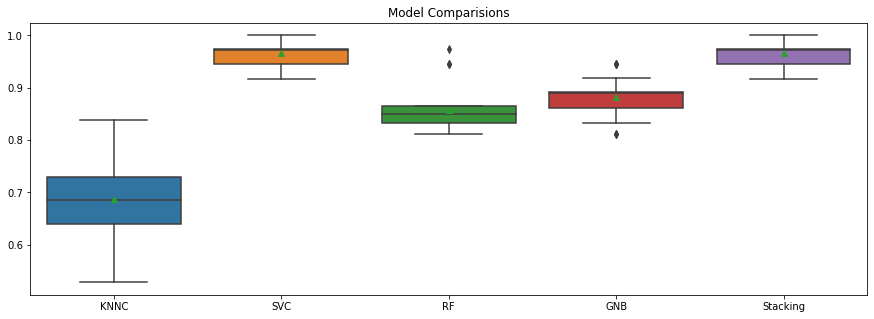

In [ ]:
plt.figure(figsize=(15,5))
fig = sns.boxplot(x=names, y=model_results, showmeans=True)
plt.title("Model Comparisions")
plt.show(fig)

### Conclusion
- With a stacking model, we were able to get an F1 score of 96.7%, which was greater than the target of 81.1%